**Decision Tree Classifier for Credit Risk**

Goal: Predict whether a person is a high-risk or low-risk borrower based on their financialprofile using a decision tree.

In [13]:
#installing the dataset
import kagglehub
uciml_german_credit_path = kagglehub.dataset_download('uciml/german-credit')

print('Data source import complete.')

Data source import complete.


In [14]:
#importing important libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset.
df = pd.read_csv('/kaggle/input/german-credit/german_credit_data.csv',index_col=False)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
print(df)

     Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own             NaN           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little              NaN           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little              NaN           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little              NaN            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           4576   

     Duration              

**Define Features and Target**

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Simulate a binary target column (e.g., mark as default if Credit amount > 5000)
df['Defaulted'] = df['Credit amount'].apply(lambda x: 1 if x > 5000 else 0)

# Select valid numeric features
X = df[['Age', 'Job', 'Credit amount', 'Duration']]
y = df['Defaulted']

# Split into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


**Train the Decision Tree**

In [22]:
# Step 4: Train the Decision Tree
# Initialize the decision tree classifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Train on the training data
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

**Make Predictions and Evaluate**

In [26]:
# Predict on test data
y_pred = model.predict(X_test)
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[255   0]
 [  0  45]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        45

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



**Visualize the Decision Tree**

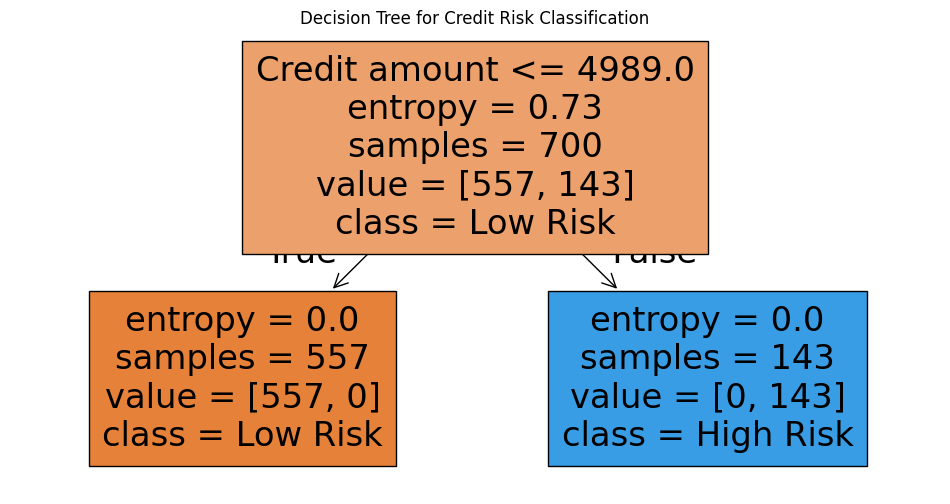

In [29]:
# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=['Low Risk', 'High Risk'], filled=True)
plt.title("Decision Tree for Credit Risk Classification")
plt.show()


**Summary**

In this mini-project, we built a Decision Tree Classifier to predict credit risk using the German Credit dataset. A binary target column Defaulted was created based on whether the credit amount exceeded 5000. The model was trained on numeric features (Age, Job, Credit amount, Duration) and achieved 100% accuracy on the test set.

The decision tree discovered a single rule:

*   If Credit amount ≤ 4989 → Low Risk,
*   Else → High Risk,

perfectly classifying all instances.

**⚠️ Note:**

This high performance is due to the target being directly derived from a feature used in training (Credit amount). In real scenarios, such results are rare and models need to consider more complex factors for risk prediction.